In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/cleaned_telecom_data.csv")
df.head()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.og.unq.any.p2,s2.rch.val.p6,s8.new.rev.p6,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s3.new.rev.p3,...,prop.og.mou.any.p2,s4.low.blnc.ins.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.data.ins.l14,prop.loc.i2i.mou.og.mou.p6
0,-0.76,88.0482,3.106604,3.754955,14.0,39.29,-0.17,-0.72,1.000000,7.16,...,38.660512,7,-0.50,-0.11,0.240533,0.666667,0.0,0,0,0.494346
1,-0.98,67.5039,3.094574,5.550865,2.0,21.67,-0.32,-0.08,0.500000,1.10,...,4.773690,13,-0.11,-0.13,0.459725,0.700000,0.0,0,0,0.767617
2,-0.98,33.9248,2.324016,2.438114,3.0,30.00,-0.05,-0.09,0.384615,4.19,...,0.763355,10,-0.39,-0.12,0.111785,0.333333,0.0,1,0,0.696090
3,-0.92,82.6780,2.630749,2.858961,3.0,50.00,-0.18,1.83,0.416667,0.40,...,0.787963,11,-0.02,-0.14,1.920826,0.333333,0.0,2,0,0.437088
4,-0.97,96.8379,2.674316,2.912397,2.0,22.50,0.01,-0.04,0.222222,5.12,...,0.941257,0,-0.63,-0.02,1.728186,0.750000,0.0,1,2,0.585977


In [3]:
df.shape

(25000, 31)

In [4]:
cols = df.columns
print(cols)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.og.unq.any.p2', 's2.rch.val.p6',
       's8.new.rev.p6', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4', 's3.new.rev.p3',
       's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target',
       's6.rtd.mou.p2.m2', 's1.og.hom.mou.p1', 's7.rev.p2.p6',
       's3.og.rev.all.p1', 'ds.usg.p6', 's3.new.rev.p1', 's5.rev.p1',
       'prop.og.mou.any.p2', 's4.low.blnc.ins.p3', 's8.rtd.mou.p3',
       's8.og.mou.all.p6', 's7.rtd.mou.m1.m2', 's7.s5.s4.day.nomou.p3',
       's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.data.ins.l14',
       'prop.loc.i2i.mou.og.mou.p6'],
      dtype='object')


In [6]:
#churn - switch to other provider - target = 1
#not churn - remain active customer - target = 0

In [7]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7821
Test Accuracy: 0.7896


In [13]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_report = classification_report(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[3134  303]
 [ 749  814]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3437
           1       0.73      0.52      0.61      1563

    accuracy                           0.79      5000
   macro avg       0.77      0.72      0.73      5000
weighted avg       0.78      0.79      0.78      5000



<Axes: >

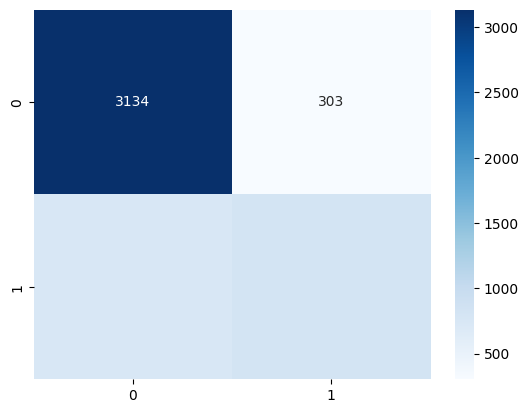

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [16]:
from sklearn.exceptions import ConvergenceWarning
import warnings
param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [700, 800, 1000]
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
warnings.filterwarnings("ignore", category=ConvergenceWarning)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [700, 800, 1000], 'penalty': ['l2'],
                         'solver': ['saga']},
             scoring='accuracy')

In [17]:
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, solver='saga')

In [18]:
print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}


In [19]:
train_pred = best_clf.predict(X_train)
test_pred = best_clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.7937
Test Accuracy: 0.8026


In [20]:
conf_matrix = confusion_matrix(y_test, test_pred)
class_report = classification_report(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[3120  317]
 [ 670  893]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      3437
           1       0.74      0.57      0.64      1563

    accuracy                           0.80      5000
   macro avg       0.78      0.74      0.75      5000
weighted avg       0.80      0.80      0.79      5000



<Axes: >

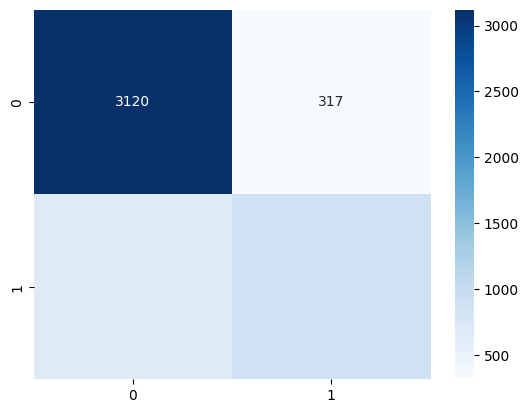

In [21]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')